<a href="https://colab.research.google.com/github/Udayan-Joshi/EV_Market_Segmentation_Feynn_Labs/blob/main/EV_Market_Analysis_Group_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EV Market Segmentation - Income Based**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/indian_automobile_buying_behaviour.csv')

In [ ]:
#Basic Features of the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [ ]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [ ]:
#First 5 rows of the Data Frame
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [ ]:
df['Annual_Income_Lakhs'] = df['Total Salary'] / 100000


X = df[['Annual_Income_Lakhs', 'Price']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Annual_Income_Lakhs
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,8.0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,20.0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,18.0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,22.0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,26.0


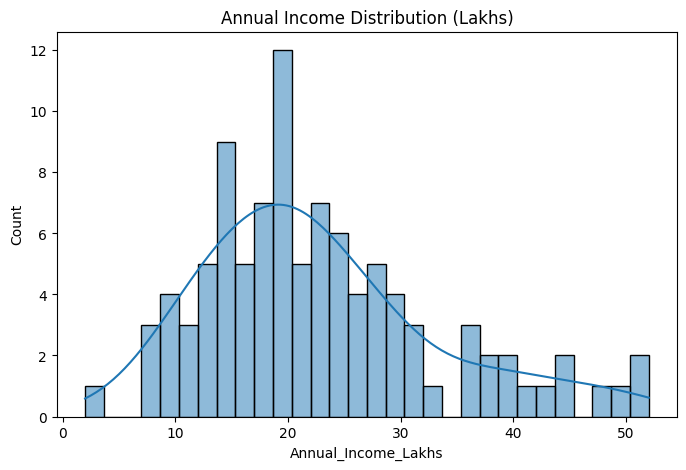

In [ ]:
#Income Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Annual_Income_Lakhs'], bins=30, kde=True)
plt.title("Annual Income Distribution (Lakhs)")
plt.show()

In [ ]:
#Silhouette Score
silhouette_scores = {}

for k in range(2, 8):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score
    print(f"Number of clusters = {k}, Silhouette Score = {score:.3f}")

Number of clusters = 2, Silhouette Score = 0.508
Number of clusters = 3, Silhouette Score = 0.505
Number of clusters = 4, Silhouette Score = 0.498
Number of clusters = 5, Silhouette Score = 0.489
Number of clusters = 6, Silhouette Score = 0.503
Number of clusters = 7, Silhouette Score = 0.466


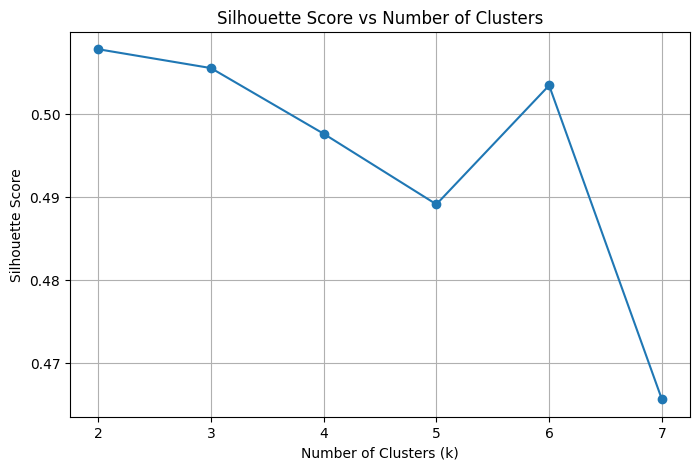

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

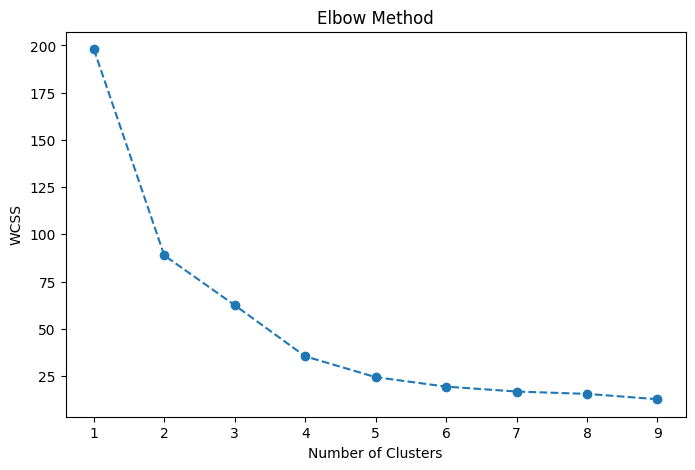

In [ ]:
#Elbow for OptimizedKmean
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

K-mean optimized cluster =3

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

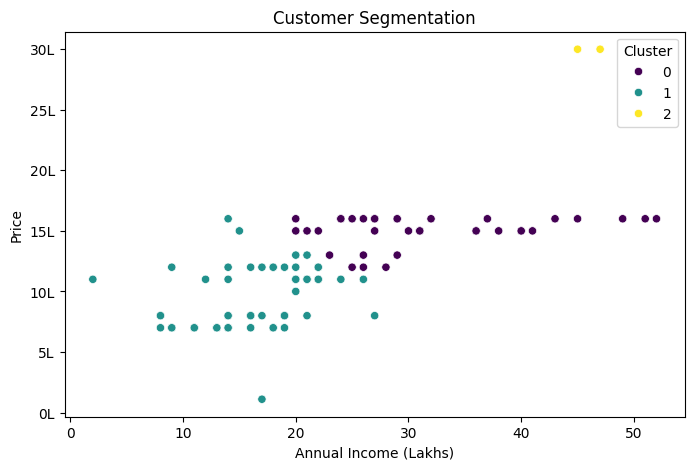

In [ ]:
#visualization
df['Price_Lakhs'] = df['Price']
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=df, x="Annual_Income_Lakhs", y="Price_Lakhs",
                     hue="Cluster", palette="viridis")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income (Lakhs)")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{int(x/100000)
}L"))
plt.ylabel("Price")
plt.show()

In [ ]:
#Cluster Profiling
cluster_profile = df.groupby('Cluster').agg({
    'Annual_Income_Lakhs': ['mean', 'min', 'max'],
    'Price': ['mean', 'min', 'max']
})
print(cluster_profile)
print("\nCluster sizes:")
print(df['Cluster'].value_counts())

        Annual_Income_Lakhs                     Price                  
                       mean   min   max          mean      min      max
Cluster                                                                
0                 31.605263  20.0  52.0  1.505263e+06  1200000  1600000
1                 16.186441   2.0  27.0  9.323729e+05   110000  1600000
2                 46.000000  45.0  47.0  3.000000e+06  3000000  3000000

Cluster sizes:
Cluster
1    59
0    38
2     2
Name: count, dtype: int64


Based on silhouette score evaluation, k=2 had the highest score (0.508).
However, the difference between k=2 (0.508) and k=3 (0.505) is minimal.
To achieve more meaningful and business-actionable income segmentation for EV strategy, we selected k = 3 clusters for final segmentation.

    k=3 → Better segmentation into:

1. Budget buyers

2. Mid-income aspirers

3. Premium buyers